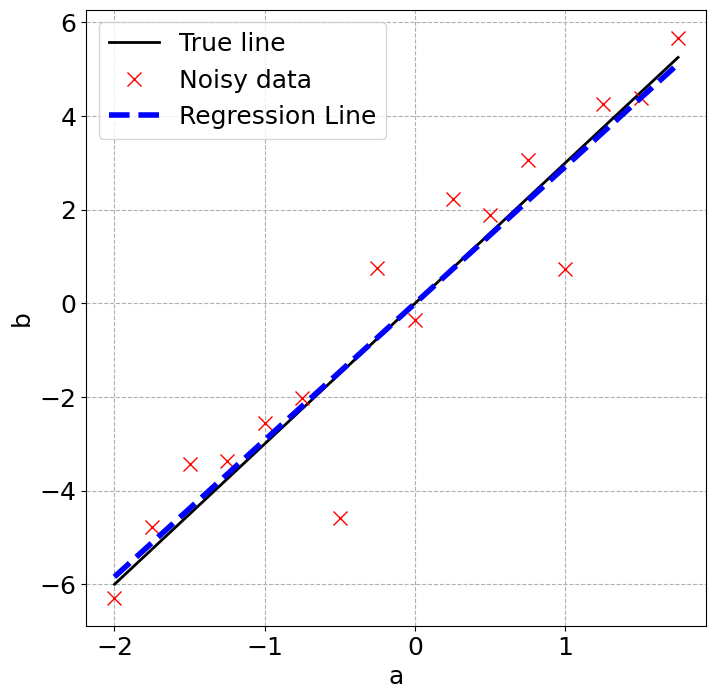

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line')
plt.plot(a, b, 'x', color='r', markersize = 10, label='Noisy data')

U, S, VT = np.linalg.svd(a, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a, '--', color='b', linewidth=4, label='Regression Line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

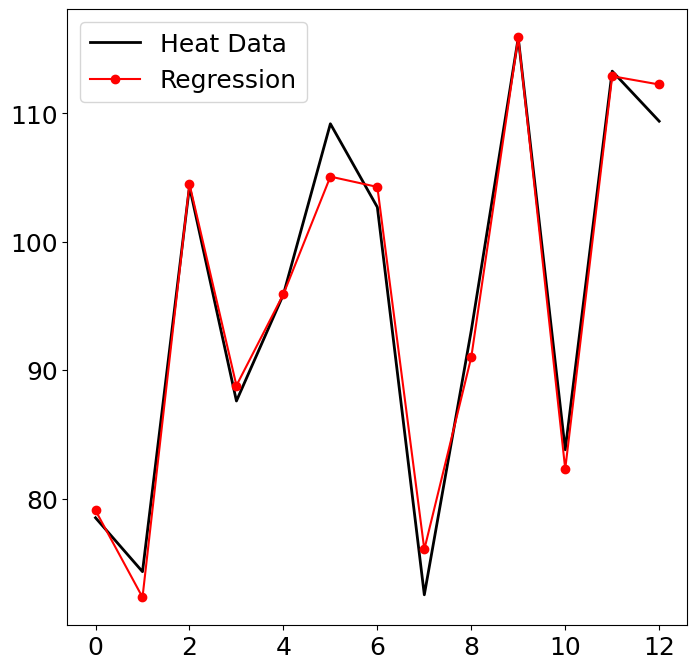

In [10]:
# Computing the regression using svd on multi-dimensional data

import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
A = np.loadtxt(os.path.join('.','data','hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('.','data','hald_heat.csv'),delimiter=',')

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Heat Data') # True Relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()


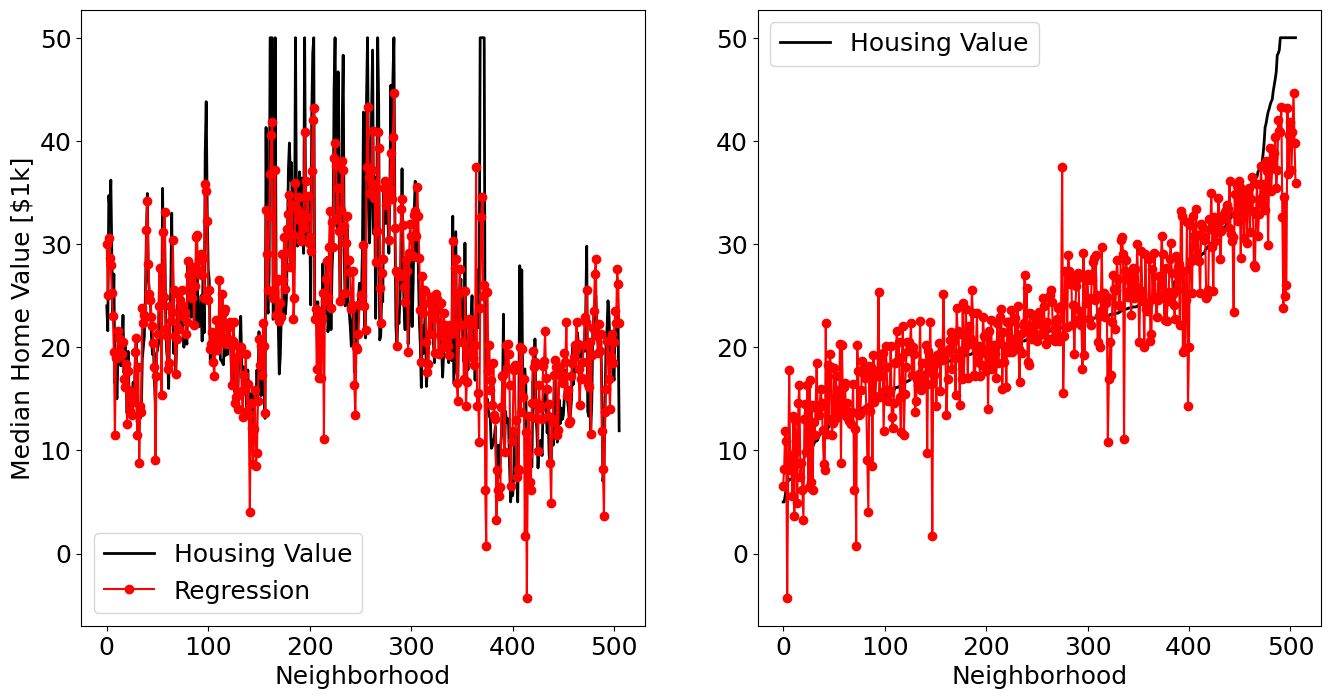

In [11]:
# Linear regression to predict house prices using svd

import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# load dataset
H = np.loadtxt(os.path.join('.','data','housing.data'))
b = H[:, -1] # Housing values in $1000s
A = H[:, :-1] # All other features

# Pad with ones for non-zero offset
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)


# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True Relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:, -1])
b = b[sort_ind] # Sorted values
plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6)
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

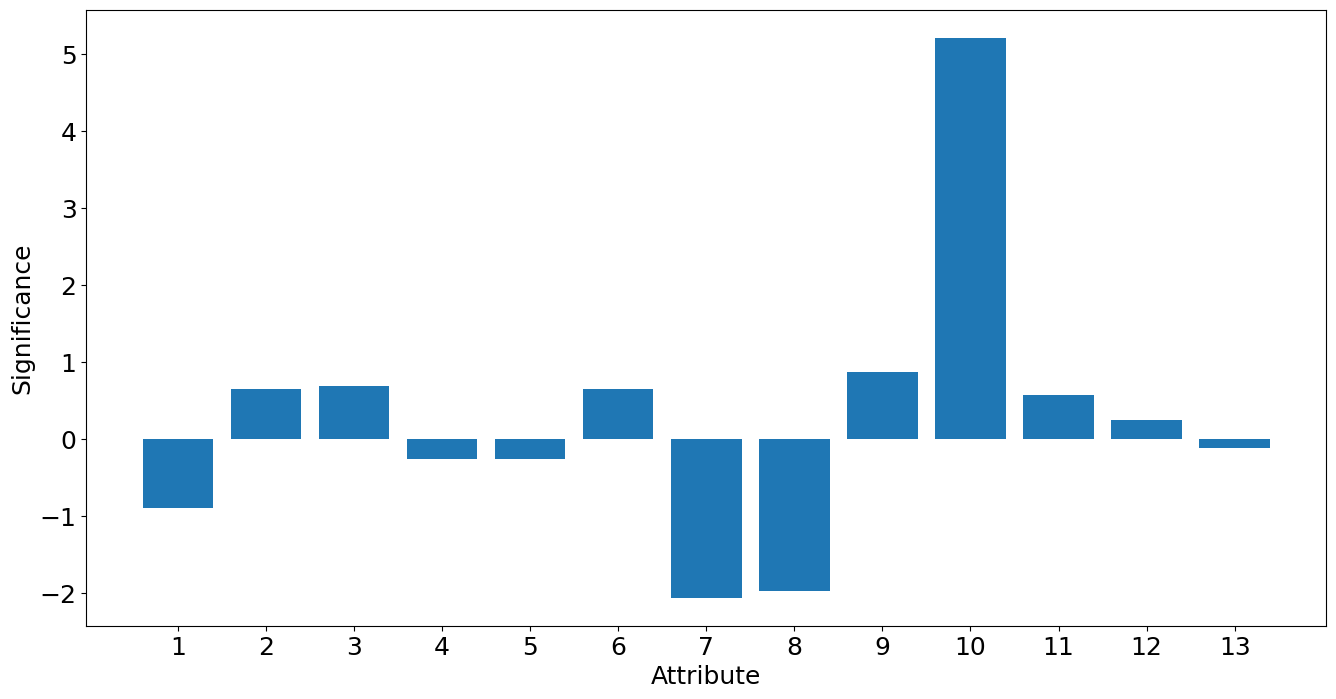

In [12]:
# Plotting the significance of the different attributes

A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1,1)

A2 = A - np.ones((A.shape[0], 1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x) - 1) + np.ones(len(x) - 1)
plt.bar(x_tick, x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

"""The plot shows that 7,8 are negatively correlated and important to the predictions same with 10 which is positively correlated

The disadvantage of the first approach is that all the data was used to train the model which can give room for overfitting.
"""

Below we are splitting the data and training a percentage of it

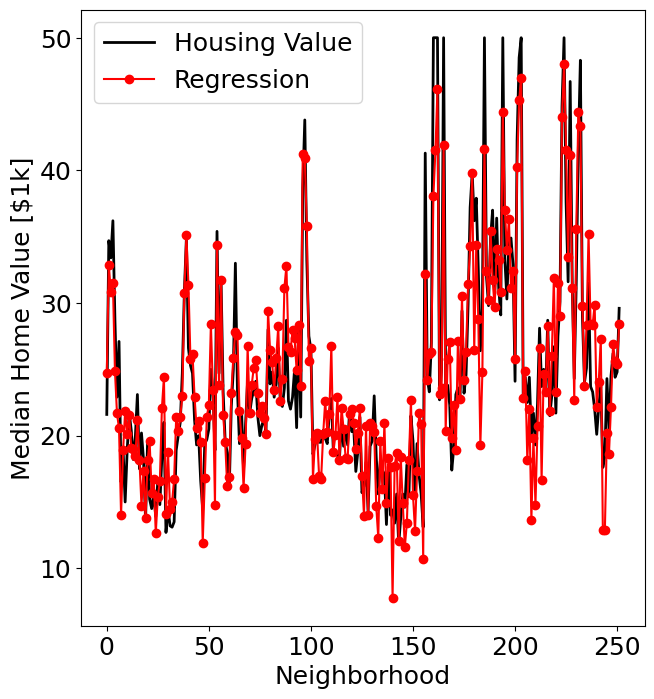

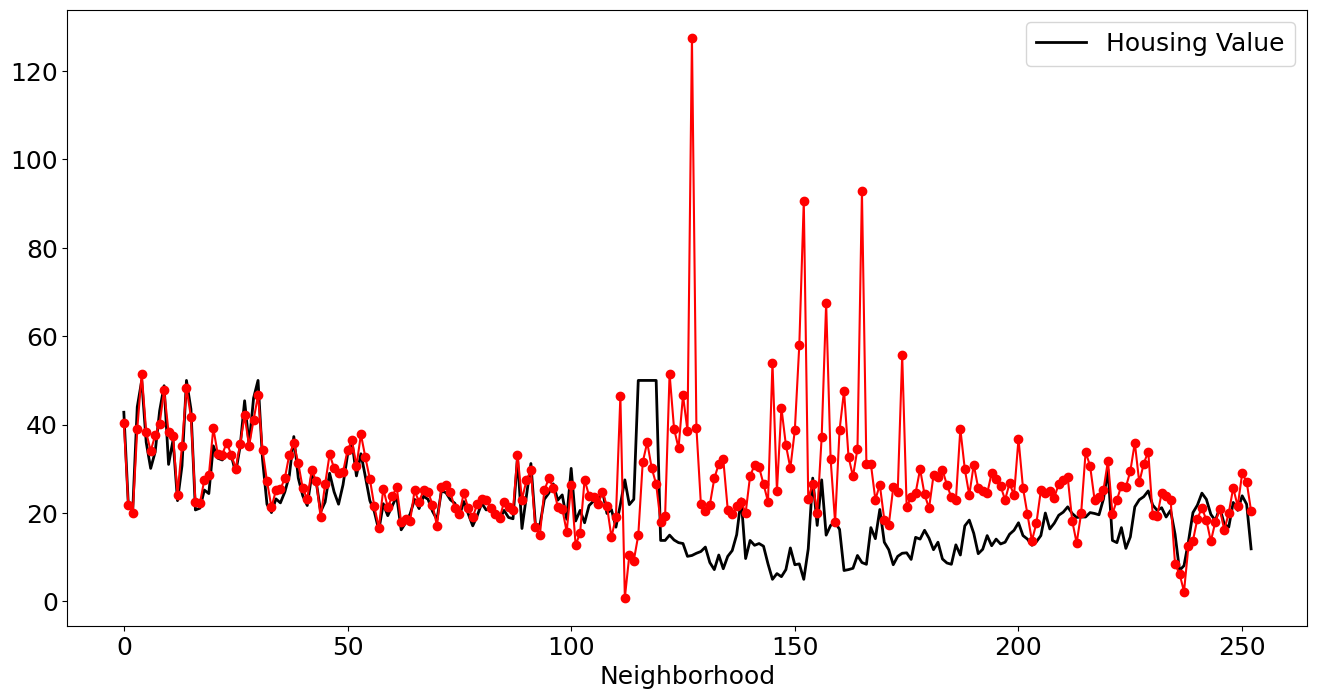

In [16]:
# Load dataset
H = np.loadtxt(os.path.join('.','data','housing.data'))
b = H[:, -1] # Housing values in $1000s
A = H[:, :-1] # All other features

# Pad with ones for non-zero offset
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)


# Split into training and testing sets
n = 253;
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(Atrain, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, color='k', linewidth=2, label='Housing Value') # True Relationship
plt.plot(Atrain@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()
plt.show()


ax2 = fig.add_subplot(122)
plt.plot(btest, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(Atest@x, '-o', color='r', linewidth=1.5, markersize=6)
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

From the above results we can see that the model doesn't perform well on the predictions. This can be as a result of the differences in requirements per Neigborhood.

Our approach now is to shuffle the data and pull random data that we'll split into train and test.

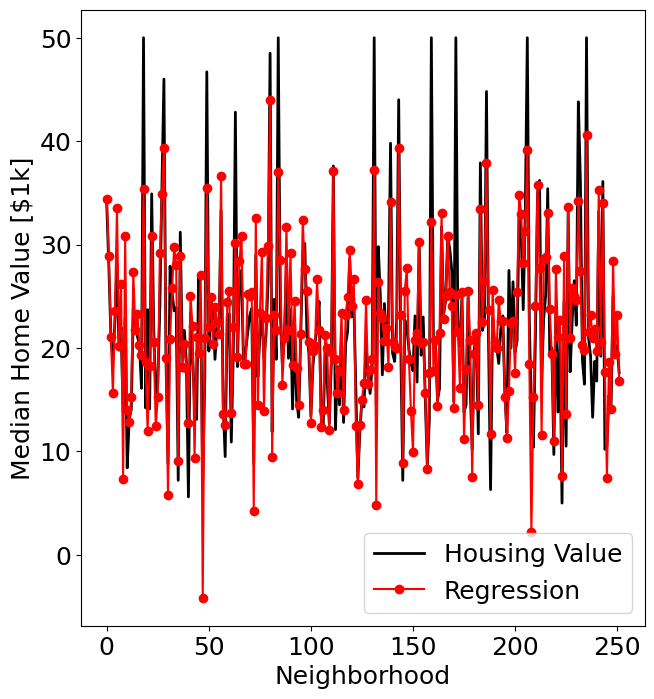

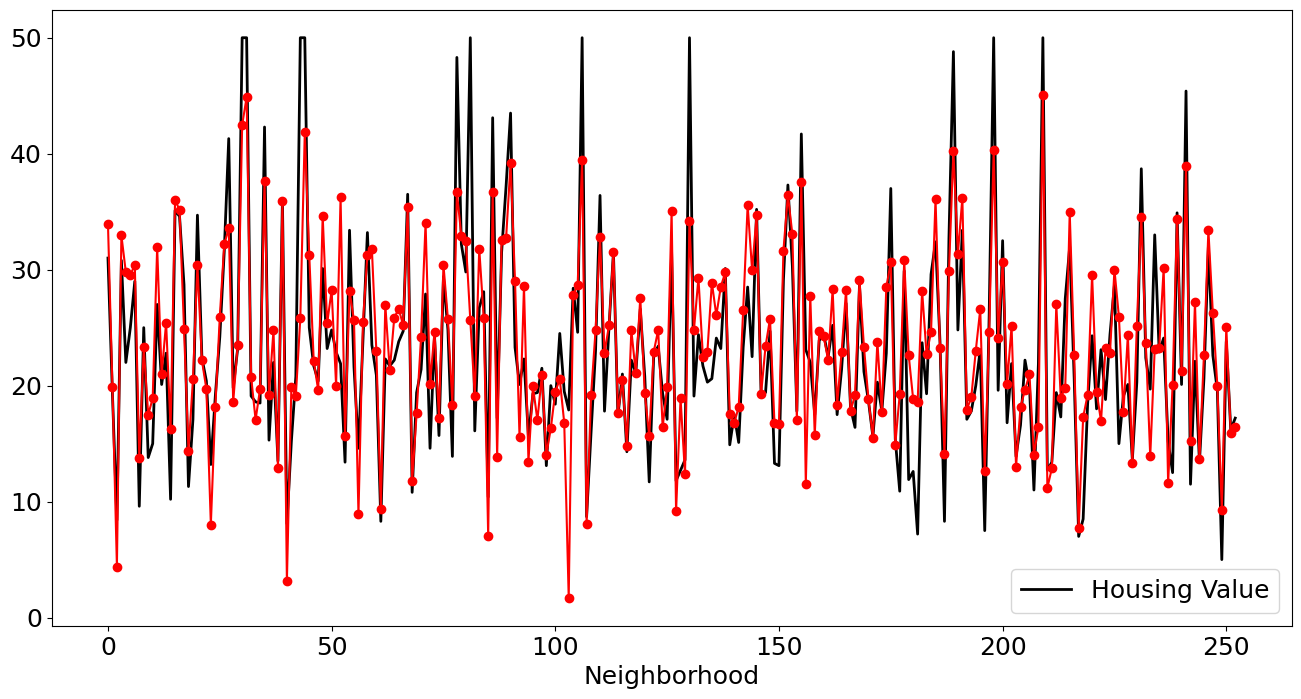

In [17]:
# Load dataset
H = np.loadtxt(os.path.join('.','data','housing.data'))
b = H[:, -1] # Housing values in $1000s
A = H[:, :-1] # All other features

# Pad with ones for non-zero offset
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)


# Split into training and testing sets
n = 253;
p = np.random.permutation(506);
A = A[p,:]
b = b[p]
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(Atrain, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, color='k', linewidth=2, label='Housing Value') # True Relationship
plt.plot(Atrain@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()
plt.show()


ax2 = fig.add_subplot(122)
plt.plot(btest, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(Atest@x, '-o', color='r', linewidth=1.5, markersize=6)
plt.xlabel('Neighborhood')
plt.legend()
plt.show()